In [ ]:
from google.colab.patches import cv2_imshow
from skimage import io
import os


import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import random
import seaborn as sns
from tqdm.notebook import tqdm
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from keras_preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Input

In [ ]:
!pip install -q keras

In [ ]:
!pip install tensorflow

In [ ]:
from zipfile import ZipFile
filename = "Female Dominant 200 600.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
len(os.listdir('Female Dominant 200 600'))

800

In [ ]:
f_list = os.listdir('Female Dominant 200 600')


f_num = len(f_list)
print('Number of images:', f_num)
print(f_list[0])

Number of images: 800
24_1_3_20170104234737428.jpg.chip.jpg


In [ ]:
df = pd.DataFrame(f_list, columns = ['train_name'])

df['train_gender'] = df.apply(lambda x : x['train_name'].split('_')[1], axis = 1).astype('int')

df['train_demographical_area'] = df.apply(lambda x : x['train_name'].split('_')[2], axis = 1).astype('int')
df.head()

,train_name,train_gender,train_demographical_area
0,24_1_3_20170104234737428.jpg.chip.jpg,1,3
1,30_1_0_20170109012829305.jpg.chip.jpg,1,0
2,29_1_2_20170116163921292.jpg.chip.jpg,1,2
3,28_1_1_20170112230737559.jpg.chip.jpg,1,1
4,21_0_3_20170104230524803.jpg.chip.jpg,0,3


Text(0.5, 1.0, 'Demographic Region Distribution in Dataset')

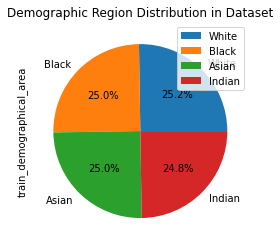

In [ ]:
df['train_demographical_area'].value_counts().plot.pie(autopct="%1.1f%%", labels = ['White' , 'Black' , 'Asian' , 'Indian'])
plt.legend()
plt.title("Demographic Region Distribution in Dataset")

Text(0.5, 1.0, 'Gender Distribution in Dataset')

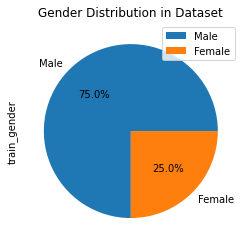

In [ ]:
df['train_gender'].value_counts().plot.pie(autopct="%1.1f%%", labels = ['Male' , 'Female'])
plt.legend()
plt.title('Gender Distribution in Dataset')

In [ ]:
from zipfile import ZipFile
filename = "all.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
t_list = os.listdir('all')


t_num = len(t_list)
print('Number of images:', t_num)
print(f_list)

Number of images: 104
['24_1_3_20170104234737428.jpg.chip.jpg', '30_1_0_20170109012829305.jpg.chip.jpg', '29_1_2_20170116163921292.jpg.chip.jpg', '28_1_1_20170112230737559.jpg.chip.jpg', '21_0_3_20170104230524803.jpg.chip.jpg', '25_1_3_20170104222350215.jpg.chip.jpg', '22_1_3_20170104222547654.jpg.chip.jpg', '29_1_1_20170112205844564.jpg.chip.jpg', '23_0_2_20170116172858865.jpg.chip.jpg', '22_0_0_20170111181750310.jpg.chip.jpg', '37_1_3_20170109141945326.jpg.chip.jpg', '25_0_1_20170113145615148.jpg.chip.jpg', '25_1_2_20170104020339110.jpg.chip.jpg', '23_0_0_20170117144550331.jpg.chip.jpg', '24_0_1_20170113132543250.jpg.chip.jpg', '25_0_2_20170104192902767.jpg.chip.jpg', '25_1_0_20170104022204452.jpg.chip.jpg', '26_1_1_20170112233658982.jpg.chip.jpg', '29_1_0_20170109002758865.jpg.chip.jpg', '28_1_1_20170112233537928.jpg.chip.jpg', '22_1_1_20170112214852574.jpg.chip.jpg', '21_1_1_20170112193009590.jpg.chip.jpg', '26_1_1_20170112235910121.jpg.chip.jpg', '25_0_1_20170113150958863.jpg.chip

In [ ]:

df_test = pd.DataFrame(t_list, columns = ['test_name'])

df_test['test_gender'] = df_test.apply(lambda x : x['test_name'].split('_')[1], axis = 1).astype('int')

df_test.head()

,test_name,test_gender
0,31_1_3_20170119155508987.jpg.chip.jpg,1
1,31_1_2_20170104020928085.jpg.chip.jpg,1
2,31_1_1_20170103183224642.jpg.chip.jpg,1
3,31_1_1_20170112210531485.jpg.chip.jpg,1
4,31_1_3_20170119200201348.jpg.chip.jpg,1


In [ ]:
test_gender = np.array(df_test['test_gender'])

print(test_gender)

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0]


In [ ]:
def test_dataset(images):
    dataset = []
    for image in tqdm(images):
        image = "all/"+image
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128))
        img = np.array(img)
        dataset.append(img)

    dataset = np.array(dataset)

    return dataset

In [ ]:
testset = test_dataset(df_test['test_name'])

  0%|          | 0/104 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
gender_dict = {0:"Male", 1:"Female"}

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
# convolutional layers
convolution_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxpool_1 = MaxPooling2D(pool_size=(2, 2)) (convolution_1)

convolution_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxpool_1)
maxpool_2 = MaxPooling2D(pool_size=(2, 2)) (convolution_2)

convolution_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxpool_2)
maxpool_3 = MaxPooling2D(pool_size=(2, 2)) (convolution_3)

convolution_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxpool_3)
maxpool_4 = MaxPooling2D(pool_size=(2, 2)) (convolution_4)

flatten = Flatten() (maxpool_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)


dropout_1 = Dropout(0.3) (dense_1)


output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)


model = Model(inputs=[inputs], outputs=[output_1])

model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856 

In [ ]:
clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize=(8,8))



def extract_Clahe_features(images):
    Clahe_features = []
    for image in tqdm(images):
        image = "Female Dominant 200 600/"+image
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128) )
        img = np.array(img)
        clahe_img = clahe.apply(img)
        Clahe_features.append(img)

    Clahe_features = np.array(Clahe_features)

    return Clahe_features


In [ ]:
X_Clahe = extract_Clahe_features(df['train_name'])

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
y_gender = np.array(df['train_gender'])

print(y_gender)

[1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1
 1 1 1 0 0 1 0 0 1 1 1 1 

In [ ]:
X_Clahe = X_Clahe/255.0

Hyperparameter 1

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
history1 = model.fit(x=X_Clahe, y=y_gender, batch_size=30, epochs=10, validation_split=0.3)

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 0.0552 - accuracy: 0.9768 - val_loss: 0.3947 - val_accuracy: 0.9000
Epoch 2/10
19/19 [==============================] - 21s 1s/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.5029 - val_accuracy: 0.9167
Epoch 3/10
19/19 [==============================] - 23s 1s/step - loss: 0.0108 - accuracy: 0.9982 - val_loss: 0.5827 - val_accuracy: 0.9125
Epoch 4/10
19/19 [==============================] - 21s 1s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5967 - val_accuracy: 0.9167
Epoch 5/10
19/19 [==============================] - 21s 1s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6959 - val_accuracy: 0.9083
Epoch 6/10
19/19 [==============================] - 21s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6833 - val_accuracy: 0.9125
Epoch 7/10
19/19 [==============================] - 22s 1s/step - loss: 6.9767e-04 - accuracy: 1.0000 - val_loss: 0.9295 - val_accuracy: 0.9000
Epoch 8/10
19/19

4/4 [==============================] - 1s 233ms/step


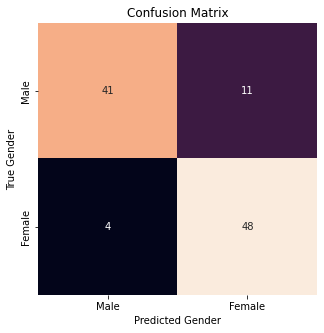

In [ ]:
pred1 = model.predict(testset)
rounded_pred1 = np.round(pred1)

res1 = tf.math.confusion_matrix(test_gender,rounded_pred1)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(res1, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:
model.evaluate(testset, test_gender)

4/4 [==============================] - 2s 214ms/step - loss: 64.8621 - accuracy: 0.8269


[64.86207580566406, 0.8269230723381042]

In [ ]:
!rm -rf 'Train Dataset'

HyperParameter 2

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
history2 = model.fit(x=X_Clahe, y=y_gender, batch_size=40, epochs=10, validation_split=0.3)

Epoch 1/10
14/14 [==============================] - 22s 2s/step - loss: 0.6328 - accuracy: 0.7643 - val_loss: 0.5891 - val_accuracy: 0.7167
Epoch 2/10
14/14 [==============================] - 21s 2s/step - loss: 0.5528 - accuracy: 0.7643 - val_loss: 0.5846 - val_accuracy: 0.7167
Epoch 3/10
14/14 [==============================] - 22s 2s/step - loss: 0.5178 - accuracy: 0.7643 - val_loss: 0.5277 - val_accuracy: 0.7167
Epoch 4/10
14/14 [==============================] - 21s 2s/step - loss: 0.4896 - accuracy: 0.7643 - val_loss: 0.4966 - val_accuracy: 0.7417
Epoch 5/10
14/14 [==============================] - 21s 2s/step - loss: 0.4435 - accuracy: 0.7804 - val_loss: 0.4549 - val_accuracy: 0.7875
Epoch 6/10
14/14 [==============================] - 21s 2s/step - loss: 0.3756 - accuracy: 0.8304 - val_loss: 0.3680 - val_accuracy: 0.8542
Epoch 7/10
14/14 [==============================] - 21s 2s/step - loss: 0.3000 - accuracy: 0.8750 - val_loss: 0.4799 - val_accuracy: 0.8208
Epoch 8/10
14/14 [==

4/4 [==============================] - 1s 242ms/step


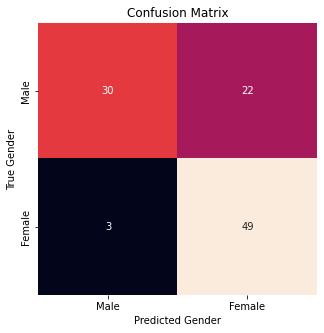

In [ ]:
pred2 = model.predict(testset)
rounded_pred2 = np.round(pred2)

res2 = tf.math.confusion_matrix(test_gender,rounded_pred2)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(res2, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:
model.evaluate(testset, test_gender)

4/4 [==============================] - 1s 234ms/step - loss: 38.1581 - accuracy: 0.7596


[38.15814208984375, 0.7596153616905212]

Hyperparameter 3

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
history3 = model.fit(x=X_Clahe, y=y_gender, batch_size=30, epochs=20, validation_split=0.3)

Epoch 1/20
19/19 [==============================] - 22s 1s/step - loss: 0.6355 - accuracy: 0.7500 - val_loss: 0.5892 - val_accuracy: 0.7167
Epoch 2/20
19/19 [==============================] - 21s 1s/step - loss: 0.5481 - accuracy: 0.7643 - val_loss: 0.5615 - val_accuracy: 0.7167
Epoch 3/20
19/19 [==============================] - 21s 1s/step - loss: 0.5233 - accuracy: 0.7643 - val_loss: 0.5129 - val_accuracy: 0.7208
Epoch 4/20
19/19 [==============================] - 22s 1s/step - loss: 0.4585 - accuracy: 0.7839 - val_loss: 0.4529 - val_accuracy: 0.7917
Epoch 5/20
19/19 [==============================] - 23s 1s/step - loss: 0.3760 - accuracy: 0.8321 - val_loss: 0.4155 - val_accuracy: 0.8125
Epoch 6/20
19/19 [==============================] - 21s 1s/step - loss: 0.3109 - accuracy: 0.8643 - val_loss: 0.4865 - val_accuracy: 0.7958
Epoch 7/20
19/19 [==============================] - 21s 1s/step - loss: 0.2702 - accuracy: 0.8786 - val_loss: 0.4450 - val_accuracy: 0.8583
Epoch 8/20
19/19 [==

4/4 [==============================] - 1s 241ms/step


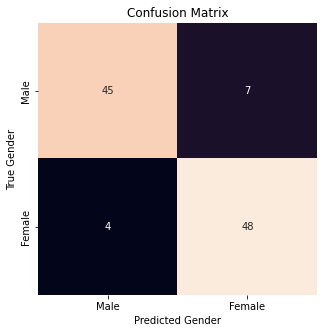

In [ ]:
pred3 = model.predict(testset)
rounded_pred3 = np.round(pred3)

res3 = tf.math.confusion_matrix(test_gender,rounded_pred3)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(res3, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:
model.evaluate(testset, test_gender)

4/4 [==============================] - 1s 237ms/step - loss: 75.9614 - accuracy: 0.8942


[75.96138000488281, 0.8942307829856873]

Hyperparameter 4

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
history4 = model.fit(x=X_Clahe, y=y_gender, batch_size=40, epochs=20, validation_split=0.3)

Epoch 1/20
14/14 [==============================] - 24s 2s/step - loss: 0.5634 - accuracy: 0.7625 - val_loss: 0.5840 - val_accuracy: 0.7167
Epoch 2/20
14/14 [==============================] - 22s 2s/step - loss: 0.5439 - accuracy: 0.7643 - val_loss: 0.6476 - val_accuracy: 0.7167
Epoch 3/20
14/14 [==============================] - 22s 2s/step - loss: 0.5258 - accuracy: 0.7661 - val_loss: 0.5164 - val_accuracy: 0.7125
Epoch 4/20
14/14 [==============================] - 22s 2s/step - loss: 0.4494 - accuracy: 0.7857 - val_loss: 0.4553 - val_accuracy: 0.7833
Epoch 5/20
14/14 [==============================] - 22s 2s/step - loss: 0.3537 - accuracy: 0.8018 - val_loss: 0.4094 - val_accuracy: 0.8292
Epoch 6/20
14/14 [==============================] - 22s 2s/step - loss: 0.2797 - accuracy: 0.8643 - val_loss: 0.4782 - val_accuracy: 0.8375
Epoch 7/20
14/14 [==============================] - 23s 2s/step - loss: 0.2659 - accuracy: 0.8768 - val_loss: 0.4037 - val_accuracy: 0.8667
Epoch 8/20
14/14 [==

4/4 [==============================] - 2s 423ms/step


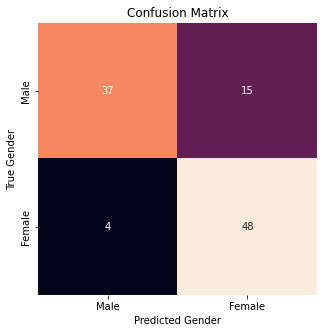

In [ ]:
pred4 = model.predict(testset)
rounded_pred4 = np.round(pred4)

res4 = tf.math.confusion_matrix(test_gender,rounded_pred4)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(res4, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:
model.evaluate(testset, test_gender)

4/4 [==============================] - 2s 429ms/step - loss: 85.9163 - accuracy: 0.8173


[85.91631317138672, 0.817307710647583]